# Task 1 by NEHA NIHARIKA KAR

Predict the percentage of a student based on the number of study hours.
This is a simple linear regression task as it involves just 2 variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Data

In [2]:
scores = pd.read_csv('http://bit.ly/w-data')
scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the Data

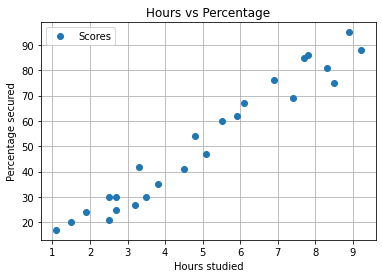

In [9]:
scores.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage secured')
plt.grid()

There is a positive linear relation between the number of hours studied and the percentage secured by the student.

In [25]:
scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the Data

In [3]:
x = scores.iloc[:, :-1].values  
y = scores.iloc[:, 1].values  
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [7]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [8]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [9]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [10]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [11]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Training the Data

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
model.coef_

array([9.77580339])

In [14]:
model.intercept_

2.483673405373196

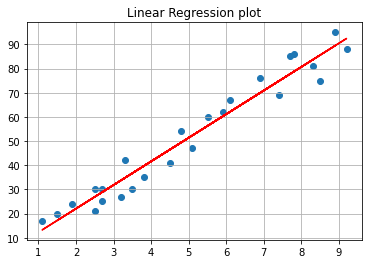

In [20]:
prediction = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x, prediction, c='r')
plt.title('Linear Regression plot')
plt.grid(True)
plt.show()

### Testing the Data

In [22]:
y_pred = model.predict(x_test)
y_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [24]:
df = pd.DataFrame({'Study Hours': x_test.flatten(), 'Actual Scores': y_test, 'Predicted Scores': y_pred})
df

,Study Hours,Actual Scores,Predicted Scores
0,1.5,20,17.147378
1,3.2,27,33.766244
2,7.4,69,74.824618
3,2.5,30,26.923182
4,5.9,62,60.160913


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared value for above model is', r2)

R-Squared value for above model is 0.9491748734859171


The R-Squared value of approximately 95% indicates that 95% of the data fits our regression model.

In [32]:
from sklearn.metrics import mean_absolute_error
mean_err = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error of above model is', mean_err)

Mean Absolute Error of above model is 4.071877793635608


### Prediction

What will be the predicted score if a student studies for 9.25 hours per day?

In [40]:
own_pred = model.predict([[9.25]])
print("If a student studies for 9.25 hours, then his predicted score will be {:.2f} %".format(own_pred[0]))

If a student studies for 9.25 hours, then his predicted score will be 92.91 %
